## <span style="color:orange;"> Grayscale/Desaturation </span>

"Grayscaling" an image, also called desaturation, is when all the color in the image is transformed to appear as a shade of gray without apparent color. Specifically, these shades represent the intensity information of the light. This can be done for a variety of reasons, from taking up less storage space to aesthetics.

When coding this transformation, there are a multitude of different methods that can be used, many of which involve calculus principles. However, some of the mathematics that may be assumed to work don't produce accurate results. Even if the resulting image looks like its been grayscaled, some of the darks or lights might be too pronounced, or the shadows might be outlined, causing the blending to look awkward.

Lets try some different methods to produce new images.

In [2]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Function to show original and grayscaled images
def showimage(img,new):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    ax[0].imshow(np.array(img))
    ax[0].axis('off')   
    ax[1].imshow(np.array(new), cmap='gray')
    ax[1].axis('off')            
    plt.show()

## Magnitude

One of the methods that may be assumed to work is taking the length, or magnitude of the image array. The magnitude of a vector can be used to find the unit vector, which has a length of 1. Similarly, grayscaling works by transforming the pixels so they only represent the intensity/brightness information of the light. Intensity is shown in an image through blacks, whites, and grays, which results in the image looking to be shades of these three "colors." By taking the magnitude and applying it to the original image array values, it can be reasoned that the resultant values would only represent a portion of the image's characteristics.

In this case we will be taking the dot product of the image array and the magnitude to produce a gray image, however, afterwards feel free to check what happens when you take the image array and divide it by the magnitude in a similar manner to finding the unit tangent vector. It produces a really interesting image.

### <span style="color:red"> Exercise </span>

Take the magnitude of RGB for the pixels of an image and find the dot product of the image array and the magnitude.

<h3 style="background-color:lightblue"> Write Answers for Exercise  Below </h3>

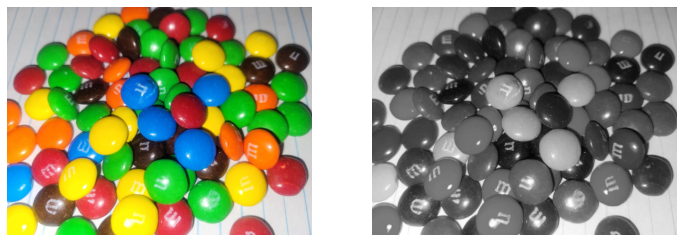

In [30]:
def magnitudemethod(img):
    img = np.array(img)
    for i in range(0, len(img)):
        mag = ((img[i,0]**2) + (img[i,1]**2) + (img[i,2]**2)) ** (1/2) #fill in here
    img = np.dot(img, mag)
    return img

img = Image.open('mnms.jpg')
new = magnitudemethod(img)
showimage(img,new)

At first glance, this might seem like a perfectly reasonable solution, since everything is grayed over and the highlights and shadows match the original picture. However, some of colors are actually completely off, such as the blue colors being too light while the yellows are too dark. Along with this, the shadows and highlights don't blend very well, which results in some of the objects looking awkward. These issues might seem minimal, with some of them not even being noticeable until compared with a more proper solution (which will be done later), but they are nonetheless issues, meaning this is not the best solution for grayscaling an image.

### RGB versus HSV

These issues may be more apparent when using the HSV (hue, saturation, value) values for the image. You may have seen HSV value options when using a printer or image editing software. While RGB defines color in terms of the combination of the primary, colors red, green, and blue, HSV deals with lighting and tints. HSV is more sensitive to changes in lighting and is more helpful when making detailed and realistic modifications to an image. In this course, we'll be primarily using RGB since it is more common for smaller changes like we're doing and is also more well-known as a concept.

However, HSV is actually the closest scheme to how humans perceive color, in comparison to RGB and CMYK (cyan, magenta, yellow, key; another color scheme). Hue is the portion of the model and is expressed as a number from 0 to 360 degrees, with primary colors falling in certain degree ranges. Saturation describes the amount of gray in a color and ranges from 0 to 100%, where the closer it gets to 0%, the more gray a color is. Value, also called brightness in some softwares (HSB), describes the intensity of a color and is also defined from 0 to 100%, with 0% being black/the darkest and 100% being white/the brightest, meaning it reveals the most color. 

Below is grayscaling using the magnitude method again, but this time with the image defined by HSV values. As can be seen, the light blues once again are considerably dark for being the lightest color in the image, aside from the background. Looking at the grayscaled image, most people would assume that the light gray objects would be the lightest colors, but they're not, just as was shown with the yellows and the blues in the RGB image.

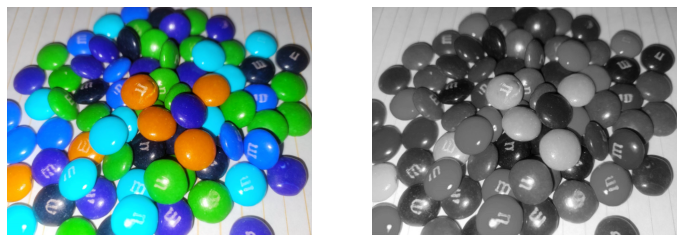

In [32]:
import cv2 # OpenCV; reads images in HSV instead of RGB

img = cv2.imread('mnms.jpg')
new = magnitudemethod(img)
showimage(img,new)

## Averaging

Other than magnitude, you may also think that taking the average of the RGB values and applying it to the image would produce a grayscaled image. The goal with grayscaling is to diminish the color values to just their intensities, so, similar to magnitude, it may make sense to try and simply find what the "middle" of the colors is. It can also be considered a form of mixing, which is a way that gray-based colors can be found if you think about it in terms of mixing paint.

### <span style="color:red"> Exercise </span>

Take the average of RGB for the pixels of an image and find the dot product of the image array and the average.

<h3 style="background-color:lightblue"> Write Answers for Exercise  Below </h3>

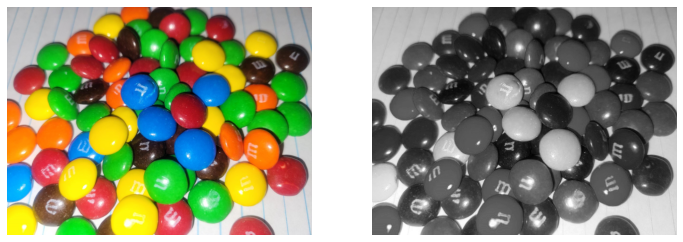

In [33]:
def averagemethod(img):
    img = np.array(img)
    for i in range(0, len(img)):
        avg = ((img[i,0]**2) + (img[i,1]**2) + (img[i,2]**2)) / 3 #fill in here
    img = np.dot(img, avg)
    return img

img = Image.open('mnms.jpg')
new = averagemethod(img)
showimage(img,new)

The results of this method should look very similar to the magnitude method, with blue being the brightest and yellow appearing almost as dark as the red and orange. In this case, the grayscaled image is actually a bit brighter than the magnitude method, though it's not very obvious at first glance.

In this case, we will not be taking the average of the HSV values since these values represent different characteristics, unlike how RGB is representative of the combination of the values.

## Using a Specific Vector

As mentioned before, taking the magnitude or average of the colors doesn't produce a well-grayscaled image for multiple reasons. So what do people normally do when trying to grayscale an image? Again, there are many methods that can be used, but one of the most common, and simplest, ways is to take the dot product of the image values and a specific vector that has the express purpose of manipulating the red, green, and blue values in an image to be gray. The specific vector you see most often is `[0.2989, 0.5870, 0.1140]`, however there are a few other vectors that produce properly grayscaled images, such as `[0.2126, 0.7512, 0.0722]`. Rounding these vectors to the tenth place is also used relatively often in coding, producing `[0.3, 0.6, 0.1]`. 

Try finding the grayscaled image using the dot product of the image values array and a specific vector.

### <span style="color:red"> Exercise </span>

Take the dot product of the image array and `[0.2989, 0.5870, 0.1140]`.

<h3 style="background-color:lightblue"> Write Answers for Exercise  Below </h3>

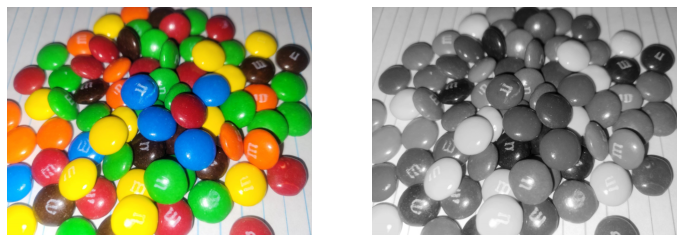

In [4]:
def rgb2gray(img):
    img = np.array(img)
    return np.dot(img, [0.2989, 0.5870, 0.1140]) #fill in here

img = Image.open('mnms.jpg')
new = rgb2gray(img)
showimage(img,new)

If you compare the resulting grayscaled image to the other methods used, you can better see that the other methods aren't producing the correct images. The correctly grayscaled image has more subdued tones and the colors blend together better. Besides this, the image also has more definition. The other methods produced images where the objects looked nearly flat or 2-dimensional even though they're 3-dimensional objects, which most likely occurs due to a lack of proper blending.

Try playing around with the vector values to see what happens to the resulting image. For example, try making one value much larger or smaller than the other two, making all the values extremely large or small, etc. You can get some super weird looking images from doing this!

Also take a look at what the grayscaled image of the HSV looks like for comparison and to see what the color intensities convert to a bit better.

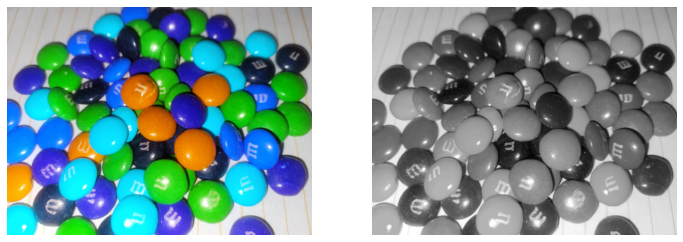

In [29]:
import cv2 # OpenCV; reads images in HSV instead of RGB

img = cv2.imread('mnms.jpg')
new = rgb2gray(img)
showimage(img,new)

As can be seen, the colors are a little bit different, unlike what happened with the magnitude method. However, in the HSV grayscaled image, the different colors are actually a bit easier to pick out, especially in the back of the picture where the lighting caused by the flash is less prevalent. As mentioned before, HSV is more sensitive to lighting differences, which is most likely why the colors are easier to pick apart in the darker part of the picture as compared to the lighter part of the picture.